## **Context**
This problem is important to solve because of the growing demand for used cars in the Indian market and the need to stay competitive and profitable in this market. With new car sales slowing down and the pre-owned car market continuing to grow, it has become increasingly important for businesses to effectively predict the prices of used cars. A reliable pricing model can help the business make informed decisions, set the correct prices for used cars, and increase its chances of success in the used car market. Additionally, the insights generated from the model can also be used to identify market trends and help the business stay ahead of the competition.


### **The objectives:**
The intended goal of developing a pricing model for used cars is to help the business make informed decisions, set the correct prices for used cars, and increase its chances of success in the used car market. The model should be able to accurately predict the price of a used car based on various factors that influence the price, such as its mileage, brand, model, year, and others. Additionally, the insights generated from the model should be used to devise profitable pricing strategies through differential pricing and stay ahead of the competition. The ultimate goal is to help the business grow and become a successful player in the used car market.


###**The key questions:**
* Which factors would affect the price of used cars?

###**The problem formulation**:
Using data science, we are trying to solve the problem of accurately predicting the price of used cars in the Indian market. By collecting and analyzing data on various factors that influence the price of a used car, such as its mileage, brand, model, year, and others, we aim to build a model that can effectively predict the price of a used car. The goal is to use this model to help the business in devising profitable pricing strategies through differential pricing, and stay competitive and successful in the used car market.


### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

# **Loading libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries to build linear model for statistical analysis and prediction
# Import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor

from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn import metrics

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Removes the limit from the number of displayed columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### **Loading and exploring the data**

Loading the data into python to explore and understand it.

In [2]:
data = pd.read_csv("used_cars.csv")

### **First and last 5 rows of the dataset**

In [3]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations**
* `S.No.` looks like an index for the data entry and such a column would not be useful for our analysis and we can drop it.

* `Car names` contain a lot of model information. Let us check how many individual names we have. If they are too many, we can process this column to extract important information.


* `New_Price` and our target variable `Price` have missing values.

In [5]:
# Removing S.No. column from data
data.drop(['S.No.'],axis = 1, inplace = True)

but want to keep reference to rows for linkage

### **Checking data types and missing values for each column**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


In [7]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations**
*  All columns have correct data types.
* `Name`,`Location`, `Year`, `Kilometers_Driven`,`Fuel_Type`,`Transmission`,`Owner_Type` columns have no missing values.
* `Mileage`,`Engine`,`Power`,`Seats`,`New_price`,`Price` columns have missing values.

In [8]:
#Converting price in USD
#100,000 INR = 1211.06 USD
data['Price'] = data['Price']*1211.06
data['New_price'] = data['New_price']*1211.06

### **Summary statistics of the dataset**

In [9]:
# Basic summary stats - Numeric variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.0000,2011.0000,2014.0000,2016.00000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.0000,34000.0000,53416.0000,73000.00000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.0000,15.1700,18.1600,21.10000,33.54
Engine,7207.0,1616.573470,595.285137,72.0000,1198.0000,1493.0000,1968.00000,5998.00
Power,7078.0,112.765214,53.493553,34.2000,75.0000,94.0000,138.10000,616.00
Seats,7200.0,5.280417,0.809277,2.0000,5.0000,5.0000,5.00000,10.00
New_price,1006.0,27587.573611,33618.230702,4735.2446,9549.2081,14011.9642,31539.03005,454147.50
Price,6019.0,11480.204940,13549.238898,532.8664,4238.7100,6830.3784,12050.04700,193769.60


**Observations**
* Vehicle production years range from 1996 to 2019.
* 53416 kilometers have been driven by at least 50% of the cars, but there are some extreme numbers because the minimum value is 171 kilometers and the largest value is 6500000 kilometers. To understand the data, we should look at the extreme numbers.
* There are typically 5 seats.
* The average cost to sell a used car is USD 11480.20. With a highest selling price of 193769.60 USD, at least 50% of vehicles have been sold for less than 6830.37 USD.
* With a maximum value of 33.5 km, used cars have an average mileage of 21 km or less. However, the fact that the minimum Mileage of 0 is also alarming; we must investigate.
* The mean new_price is 27587.57 USD, whereas the median of the new_price is 14011.96 USD. This indicates that the new_price distribution is skewed towards the right side and explains that there are only a few very high range brands, which again makes sense.

In [10]:
# Basic summary stats - Categorical variables
data.describe(include=['object'])

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


In [11]:
data.shape

(7253, 13)

**Number of unique observations in each category**

In [12]:
cat_cols = data.select_dtypes(include=['object']).columns

for column in cat_cols:

    print("For column:",column)

    print(data[column].value_counts())
    
    print('------------- fractions:')
    
    print(data[column].value_counts(normalize=True))

    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD             55
Maruti Swift VDI                   49
Maruti Swift Dzire VDI             42
Honda City 1.5 S MT                39
Maruti Swift VDI BSIV              37
                                   ..
Maruti S-Cross Zeta DDiS 200 SH     1
Tata Bolt Revotron XT               1
Maruti SX4 ZDI Leather              1
Toyota Innova Crysta 2.4 G MT       1
Maruti Celerio ZXI AMT              1
Name: Name, Length: 2041, dtype: int64
------------- fractions:
Mahindra XUV500 W8 2WD             0.007583
Maruti Swift VDI                   0.006756
Maruti Swift Dzire VDI             0.005791
Honda City 1.5 S MT                0.005377
Maruti Swift VDI BSIV              0.005101
                                     ...   
Maruti S-Cross Zeta DDiS 200 SH    0.000138
Tata Bolt Revotron XT              0.000138
Maruti SX4 ZDI Leather             0.000138
Toyota Innova Crysta 2.4 G MT      0.000138
Maruti Celerio ZXI AMT             0.000138
Name: Name, Lengt

**Observations**
* In our database, there are 2041 distinct automobiles.

* Most automobiles come from Mumbai and Hyderabad. The majority of the vehicles are manual transmissions.

* Most automobiles have their original owners. CNG, LPG, and electric fuel type vehicles are quite rare.

— Possible Effect on the Model

* Electric automobiles, LPG, and other under-represented groups may require further data collection or exclusion.
* Third and fourth + owner types are underrepresented, for example. problem?
* A sufficient number of categories, making it unnecessary to map using techniques like the hashing trick.




**Check Kilometers_Driven extreme values**

We observed from summary statistics that kilometers_driven has extreme values . We will check that column 

In [13]:
data.sort_values(by=["Kilometers_Driven"], ascending = False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,78718.900
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,9082.950
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,7145.254
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,3269.862
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,15743.780
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,6055.300
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,5389.217
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1211.060
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4844.240


**Observations**
* first row down. It is nearly inconceivable for a car that was produced as recently as 2017 to have 6500000 kilometers on it. We can eliminate this number or entry from the data since it can be regarded as a data input error.

* The remaining observations are similarly more advanced, but given that these cars are so old, the miles they have covered are still fair. These are likely outliers, and we will further examine this while performing the univariate analysis.

In [14]:
# Removing this specific row from the above observation
data.drop(2328, inplace = True)

**Check Mileage extreme values**

We also observed from summary statistics that minimum mileage is zero. We will check that column

In [15]:
data.sort_values(by = ['Mileage'], ascending = True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1356.3872
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2785.4380
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,2240.4610
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,6600.2770
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,4057.0510
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1416.9402
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,31487.5600
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,18771.4300
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3814.8390


**Observations**
* Mileage of cars can not be 0.
* we should treat 0's as missing values.

## **Univariate analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

## **1.Univariate anaysis - Numerical data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns, `Kilometers_driven`,`power`,`price`,`mileage`.

In [16]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15,10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet', orient='h') # Boxplot will be created and a star will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins=bins,palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

### **Box plot and Histogram for Kilometers Driven**

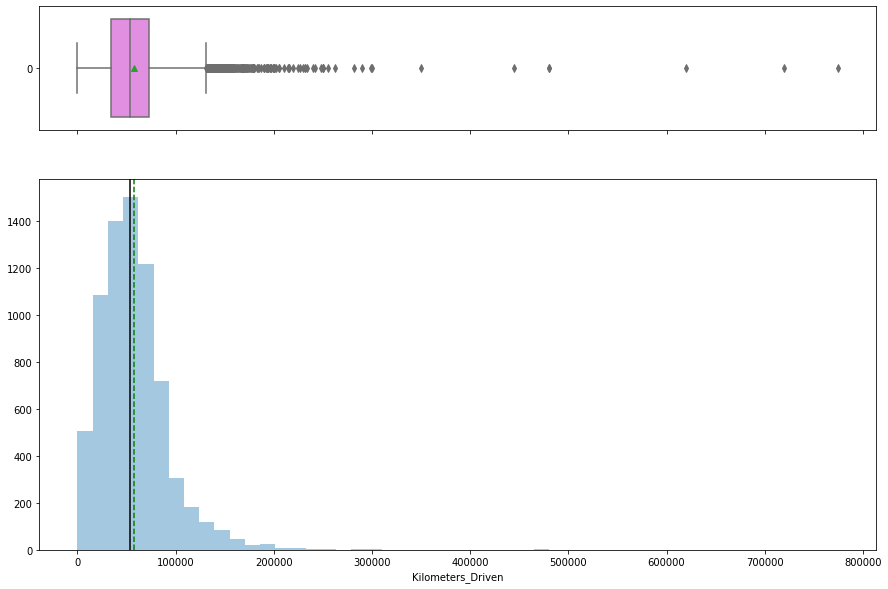

In [17]:
histogram_boxplot(data['Kilometers_Driven'])

* Kilometers_Driven is highly right-skewed. It is very difficult to interpret. Log transformation can be used to reduce/remove the skewness. Log transformed value can be used for analysis.

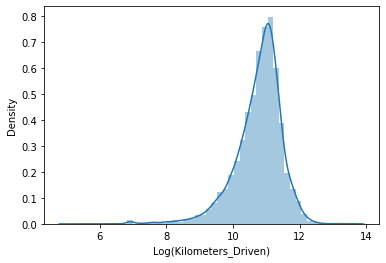

In [18]:
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations**
* Log transformation of data has reduced the extreme skewness.
* From box-plot we can see the outliers, as we discussed in summary statistics

In [19]:
# Adding a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

### **Box plot and Histogram for Mileage**

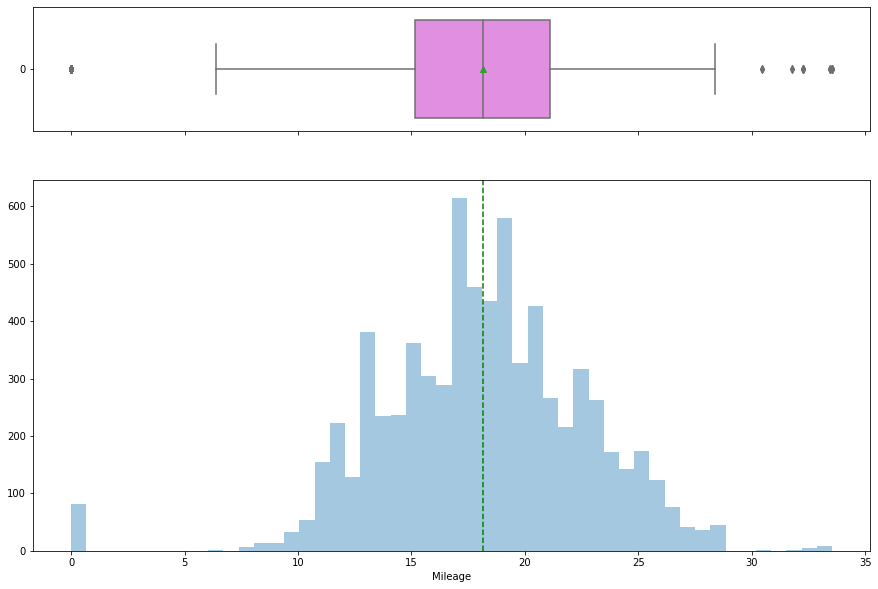

In [20]:
histogram_boxplot(data['Mileage'])

**Observations**
* The distribution of mileage looks fairly normally distributed if we ignore the cars with 0 mileage.
* From box plot also it is visible that the extreme values can be seen as outliers

### **Box plot and Histogram for Power**

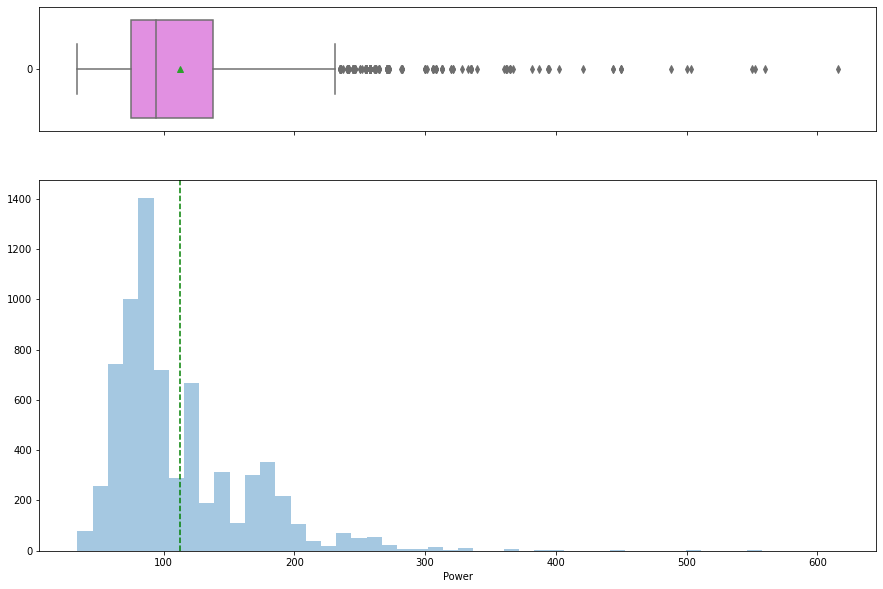

In [21]:
histogram_boxplot(data['Power'])

**Observations**
* Most cars have Power of engines between 90-100 bhp.
* From the boxplot, we can see that there are many outliers in this variable -  cars with more than 250 bhp are being considered as outliers in data.

### **Box plot and Histogram for Price**



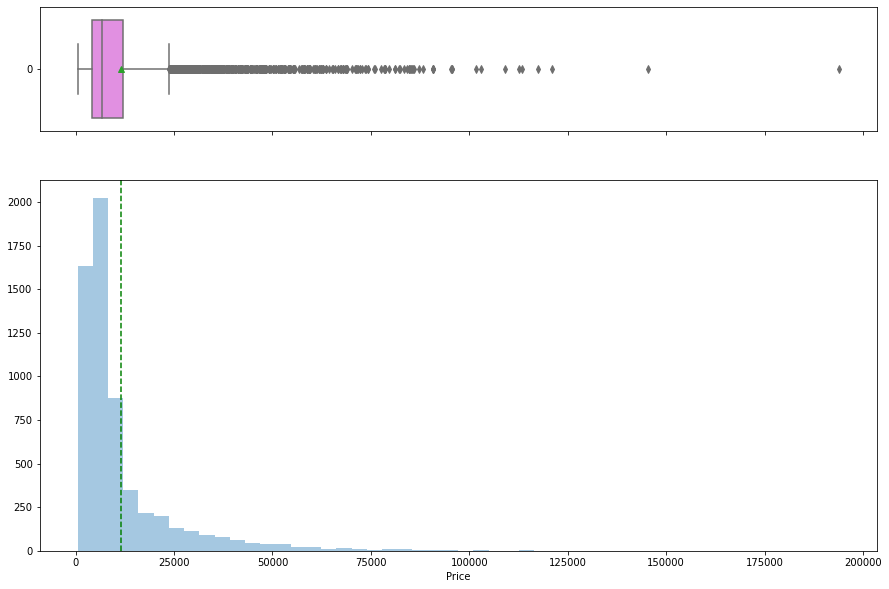

In [22]:
histogram_boxplot(data['Price'])

* The distribution of Price is highly skewed, we can use log transformation on this column to see if that helps normalize the distribution.

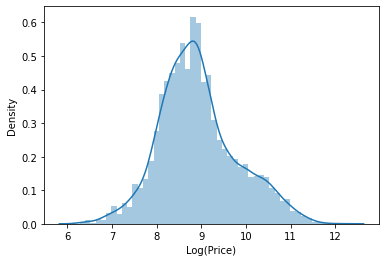

In [23]:
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");

**Observations**
* Log transformation helps to normalize the distribution
* It is observed that few extreme price values are there as we seen in summary statistics

price prediction: we will always predict positive prices due to log transform, if label is now log(price).

In [24]:
# Log Transformation has definitely helped in reducing the skew
# Creating a new column with the transformed variable.
data["price_log"] = np.log(data["Price"])

## **2.Univariate anaysis - Categorical data**

In [25]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data=data, x=z,palette = 'Paired',order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # show the plot

### **Barplot for Location**

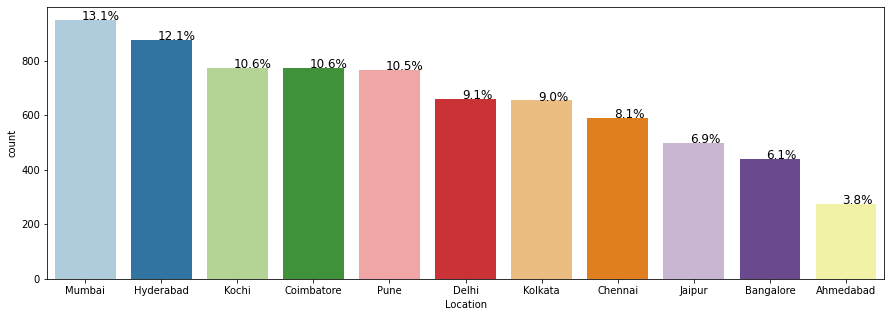

In [26]:
perc_on_bar('Location')

**Observation**
* 13.1% of the cars are from Mumbai followed by 12.1% of the cars from Hyderabad.

### **Barplot for Year**

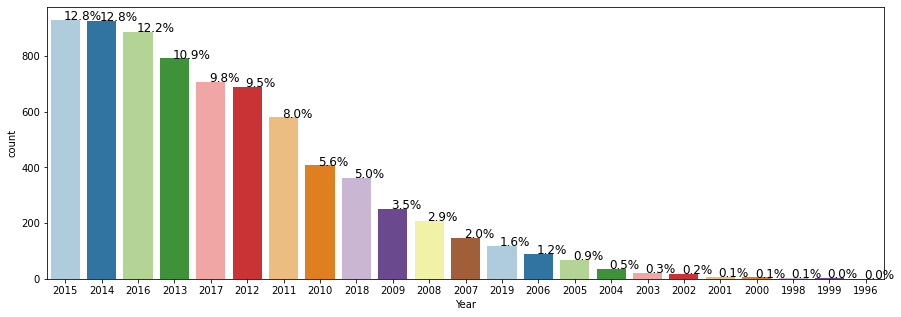

In [27]:
perc_on_bar('Year')

**Observation**
* About 38% of the cars are in are data are for the year 2014 - 2016.

Text(0, 0.5, '# of sales')

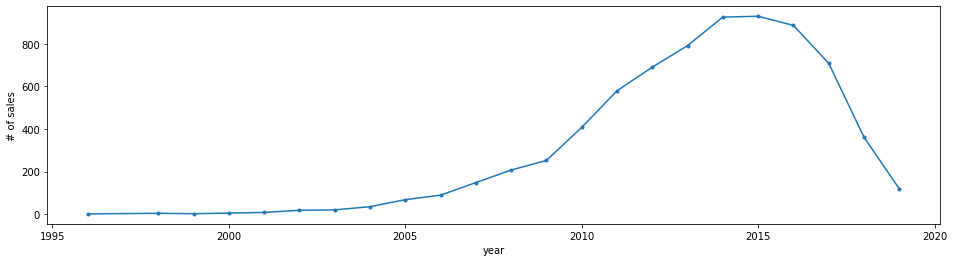

In [28]:
ax = data['Year'].value_counts().sort_index().plot(kind='line', figsize=(16,4), style='.-')
ax.set_xlabel('year')
ax.set_ylabel("# of sales")

> Concerning drop!

### **Barplot for Fuel_Type**

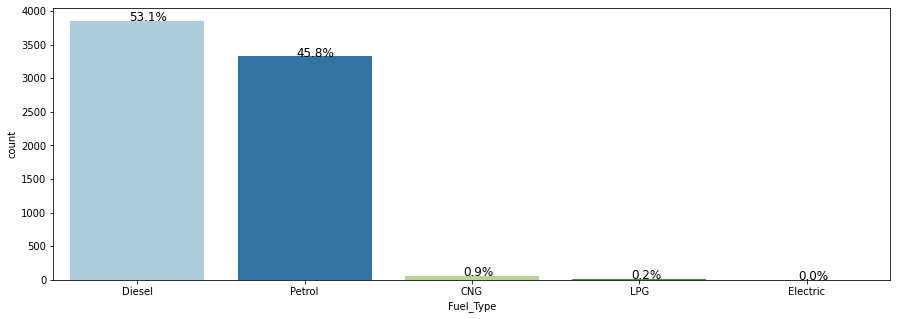

In [29]:
perc_on_bar('Fuel_Type')

**Observations**
* About 99% of the cars run on Diesel and Petrol while the rest 1% cars run on CNG, LPG and electric.

### **Barplot for Transmission**

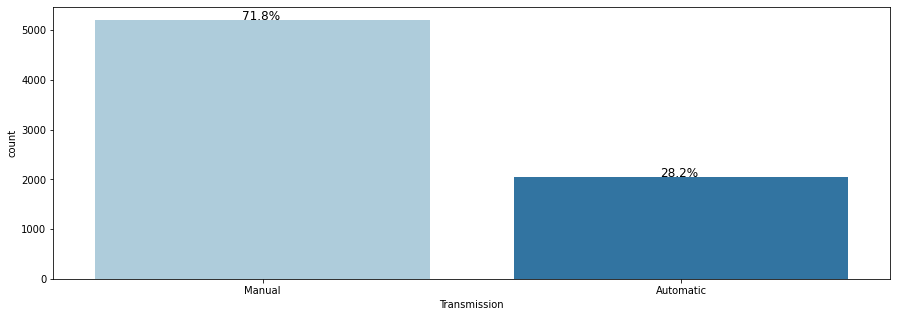

In [30]:
perc_on_bar('Transmission')

**Observations**
* 71.7% of the cars have a manual transmission.

### **Barplot for Owner_Type**

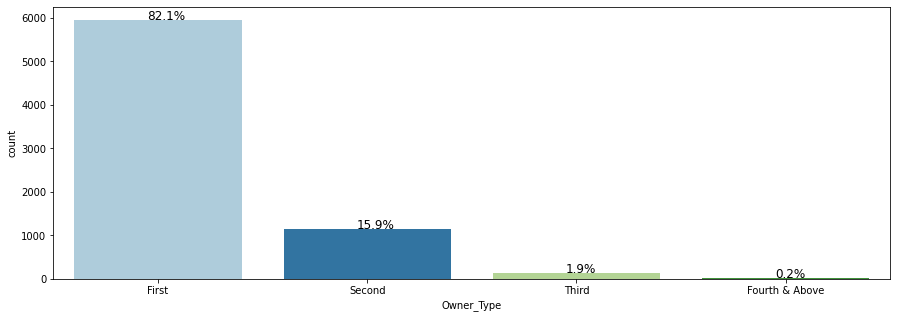

In [31]:
perc_on_bar('Owner_Type')

**Observations**
* 82% of the cars have first owners followed by 15.9% of the cars with second owners.

## **Bivariate Analysis**

### Time Axis & Drift

Remember the business problem: need to predict prices on FUTURE cars sold.

In [32]:
mean_price_by_year= data.groupby('Year')['Price'].agg(['count', 'mean']).reset_index()
mean_price_by_year

,Year,count,mean
0,1996,0,NaN
1,1998,4,1734.843450
2,1999,2,1011.235100
3,2000,4,1422.995500
4,2001,8,1869.573875
5,2002,15,1567.111640
6,2003,17,2954.986400
7,2004,31,2351.019058
8,2005,57,2454.627400
9,2006,78,4064.193149


<AxesSubplot: xlabel='Year', ylabel='Price'>

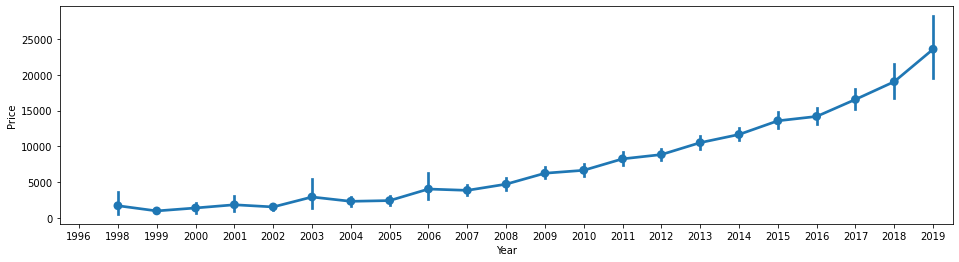

In [33]:
fig, ax = plt.subplots(figsize=(16,4))
sns.pointplot(x='Year', y='Price', data=data, ax=ax, estimator='mean', errorbar=('ci', 95))

### **1. Pair plot**
A pairs plot allows us to see both distribution of single variables and relationships between two variables.

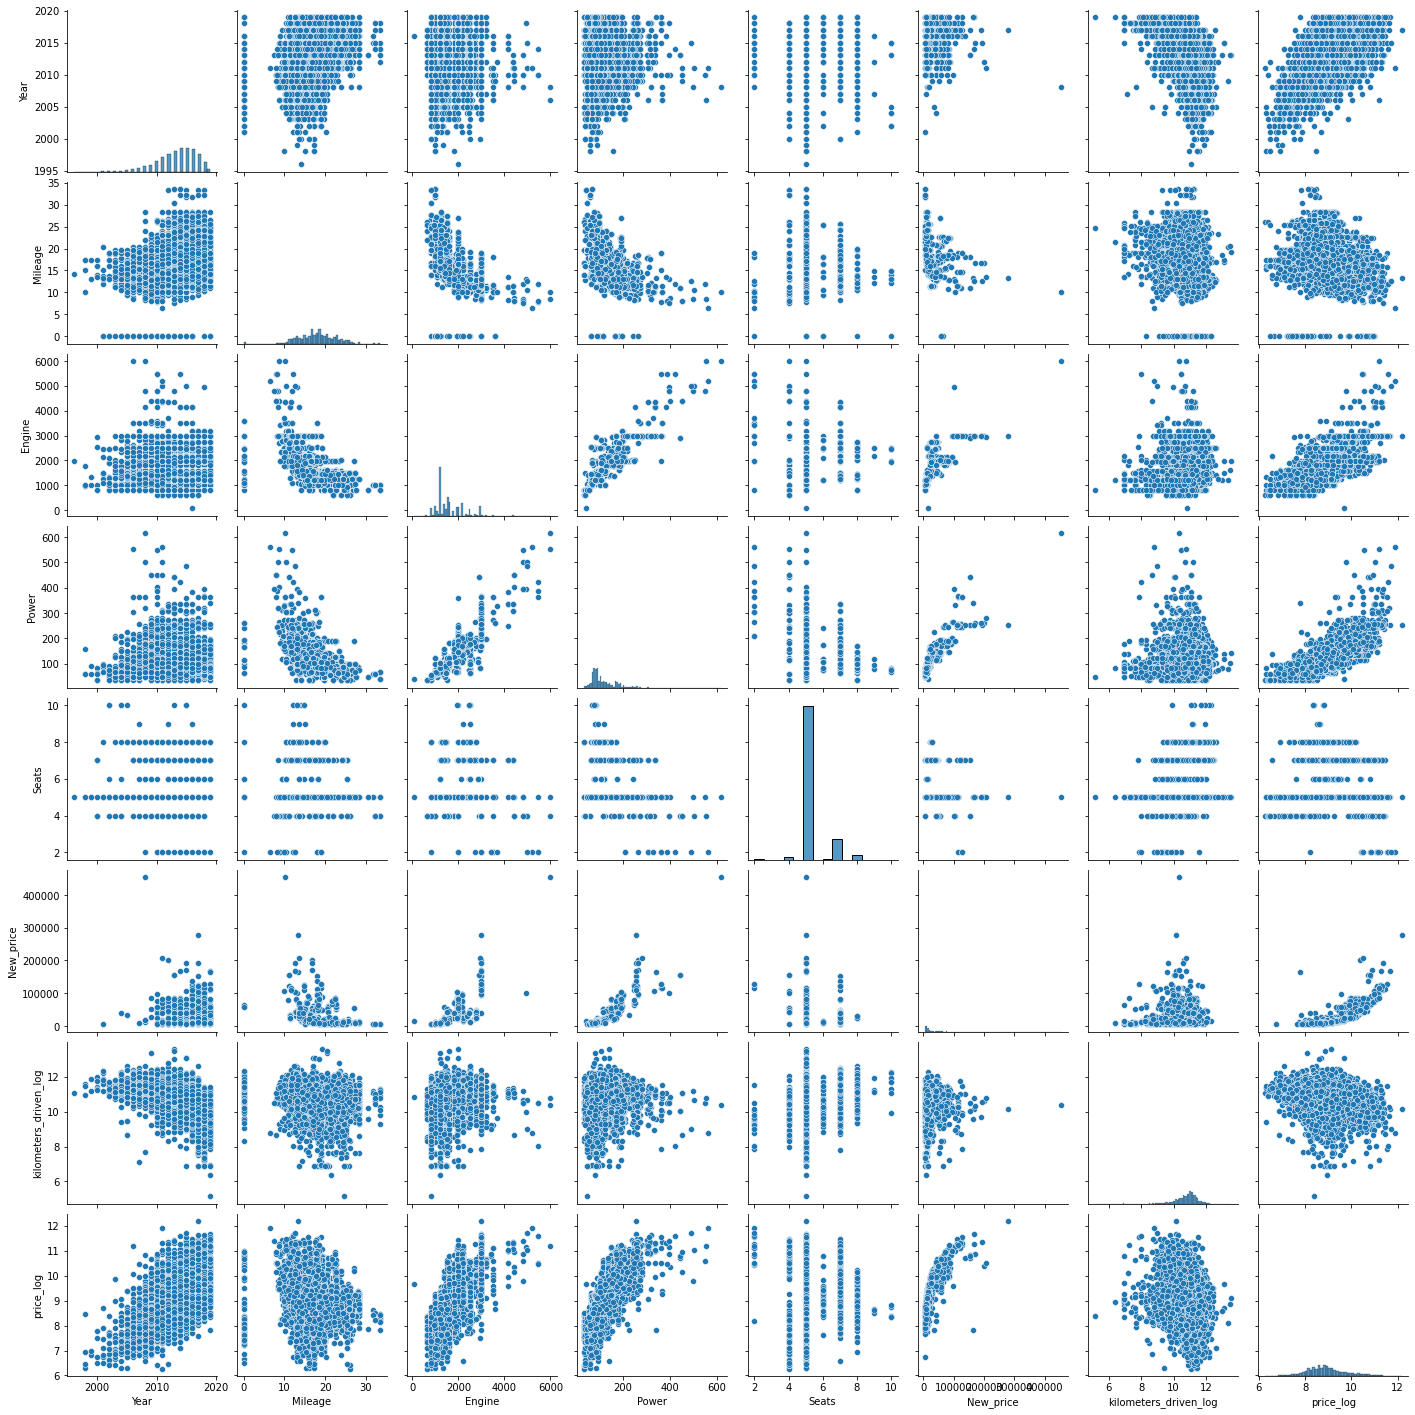

In [34]:
# We can include the log transformation values and drop the original skewed data columns
sns.pairplot(data.drop(['Kilometers_Driven','Price'],axis = 1))
plt.show()

**Observations**

Zooming into these plots gives us a lot of information - 

* Contrary to intuition **Kilometers Driven** have **no relationship** with price.
* Price has a **positive relationship with Year**. Newer the car, the higher the price.
* 2 seater cars are all luxury variants. Cars with 8-10 seats are exclusively mid to high range.
* Mileage does not seem to show much relationship with the price of used cars.
* **Engine displacement and Power** of the car have a **positive relationship** with the price.
* **New Price** and Used Car Price are also **positively correlated**, which is expected.
* Kilometers Driven has a peculiar relationship with the Year variable. Generally, the newer the car lesser the distance it has traveled, but this is not always true.
* Mileage and power of newer cars is increasing owing to advancement in technology.
* **Mileage** has a **negative correlation** with engine displacement and power. More powerful the engine, the more fuel it consumes in general.

### **2. Heat map**
Heat map shows a 2D correlation matrix between two discrete features.

correlation with age vs year

In [35]:
data['Engine']

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
7248    1598.0
7249    1197.0
7250    1461.0
7251    1197.0
7252    2148.0
Name: Engine, Length: 7252, dtype: float64

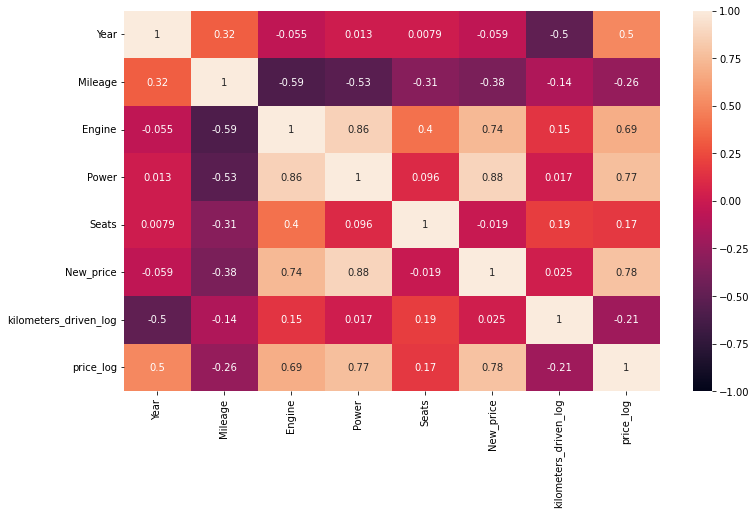

In [36]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))
sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis = 1).corr(), annot = True,vmin = -1,vmax = 1)
plt.show()

* Power and engine are important predictors of price.
* New_price is also a significant predictor of price.

> Strong correlation, multi-collinearity

### **3. Box plot**

In [37]:
# Function to plot boxplot w.r.t Price
def boxplot(z):

    plt.figure(figsize = (12, 5)) # setting size of boxplot

    sns.boxplot(x = z, y = data['Price']) # Defining x and y

    plt.show()

    plt.figure(figsize = (12, 5))

    plt.title('Without Outliers')

    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

### **Box Plot : Price vs Location**

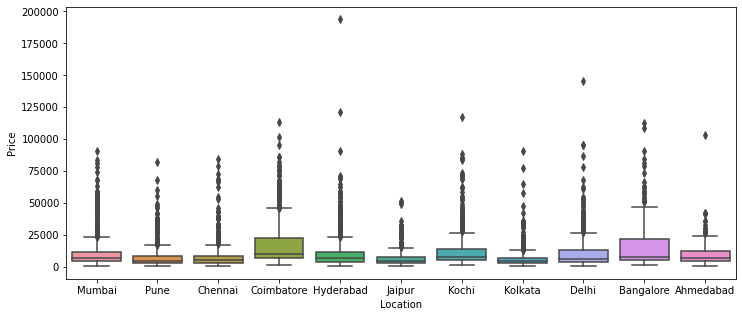

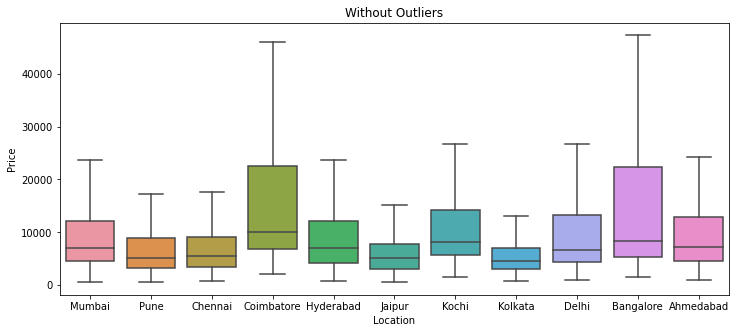

In [38]:
boxplot(data['Location'])

**Observation**
* Price of used cars has a large IQR in Coimbatore and Bangalore.
* Note: outliers depend on the amount of data, which differs between locations

### **Box Plot : Price vs Fuel_Type**

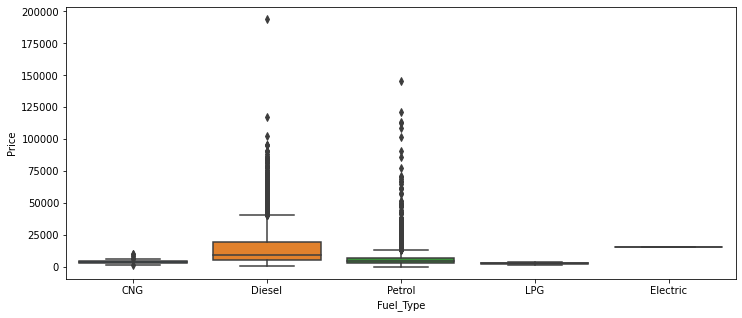

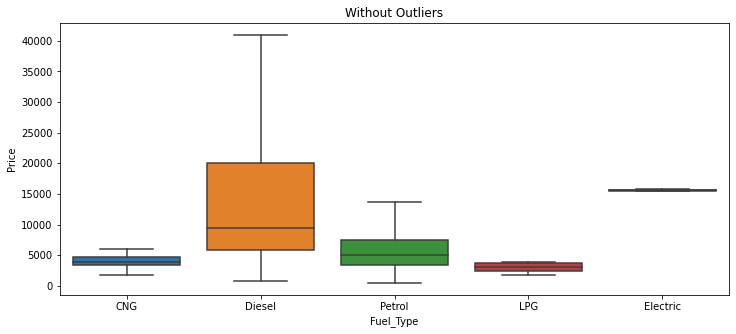

In [39]:
boxplot(data['Fuel_Type'])

**Observations**
* Diesel cars are costlier than Petrol cars.
* Electric cars are costlier than CNG and LPG cars.
* Careful: judgement based on electric cars (CNG, LPG) due to low sample size! e.g. likely no outliers

### **Box Plot : Price vs Transmission**

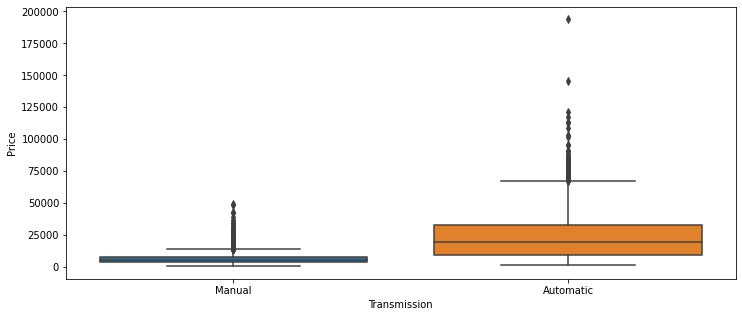

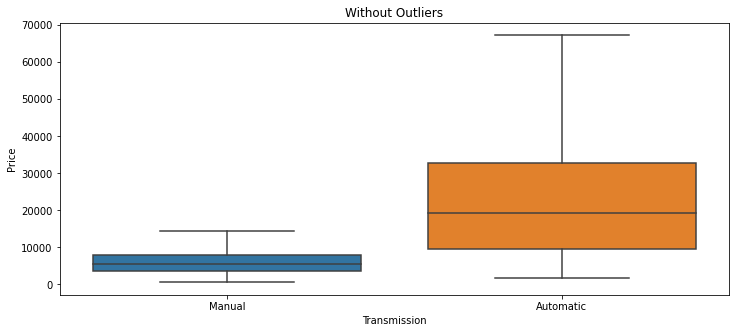

In [40]:
boxplot(data['Transmission'])

**Observation**
* Automatic transmission cars are very costly as compared to cars with manual transmission.

### **Box Plot : Price vs Owner_Type**

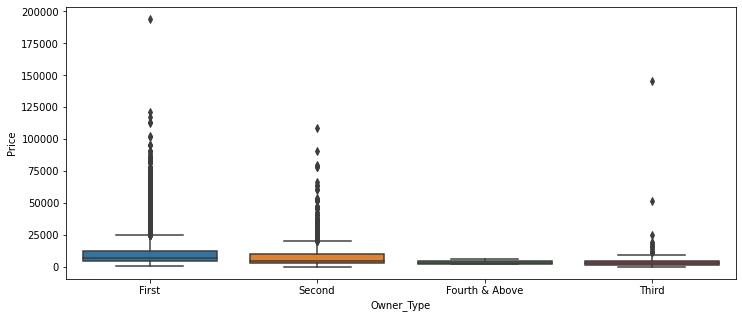

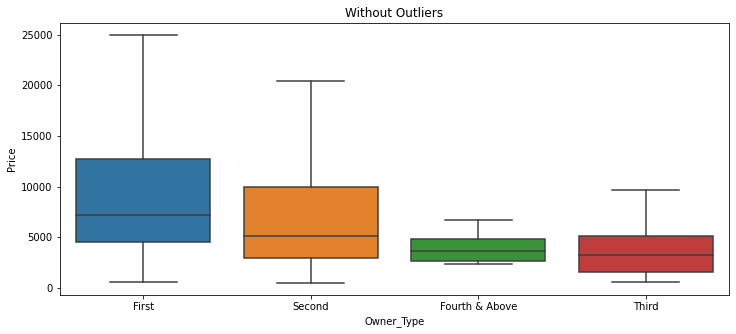

In [41]:
boxplot(data['Owner_Type'])

**Observation**
* Cars with fewer owners have higher prices, outliers in third owner cars these might be the luxury cars.

### **Feature engineering**

The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction.

In [42]:
data["Name"].nunique()

2041

* With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information and see if that reduces the number of levels for this information.

**1. Car Brand Name**

In [43]:
data["Name"]

0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7248                    Volkswagen Vento Diesel Trendline
7249                               Volkswagen Polo GT TSI
7250                               Nissan Micra Diesel XV
7251                               Volkswagen Polo GT TSI
7252    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7252, dtype: object

> What if brand names have two words?

In [44]:
# Extract Brand Names
data["Brand"] = data["Name"].apply(lambda x: x.split(" ")[0].lower())

# Check the data
data["Brand"].value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               311
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
hindustan           1
lamborghini         1
opelcorsa           1
ambassador          1
smart               1
Name: Brand, dtype: int64

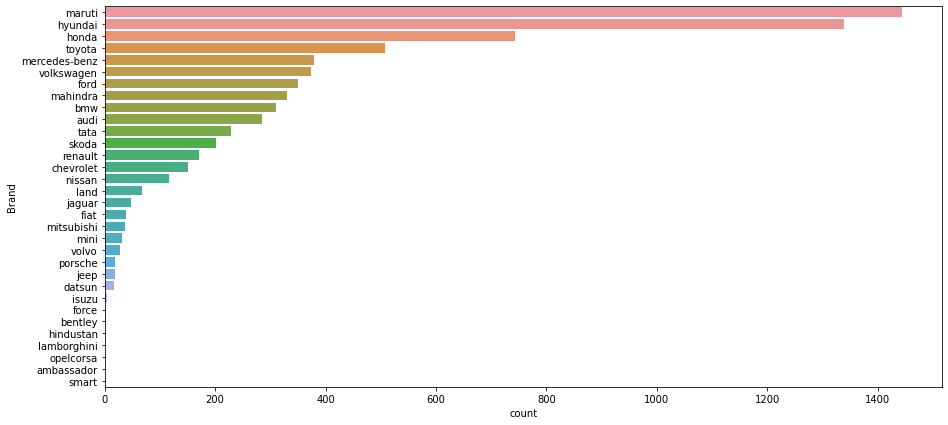

In [45]:
plt.figure(figsize = (15, 7))
sns.countplot(y = "Brand", data = data, order = data["Brand"].value_counts().index)
plt.show()

**Observation**
* Most frequent brand in our data is Maruti and Hyundai.

Some brands are under-represented, e.g. bentley with just one data point. Cannot be use to train and evaluate performance on!

**2. Car Model Name**

Again, why model name just one word?

In [46]:
# Extract Model Names
data["Model"] = data["Name"].apply(lambda x: x.split(" ")[1].lower())

# Check the data
data["Model"].value_counts()

swift       418
city        318
i20         303
innova      203
verna       200
           ... 
land          1
sl-class      1
siena         1
mustang       1
beetle        1
Name: Model, Length: 218, dtype: int64

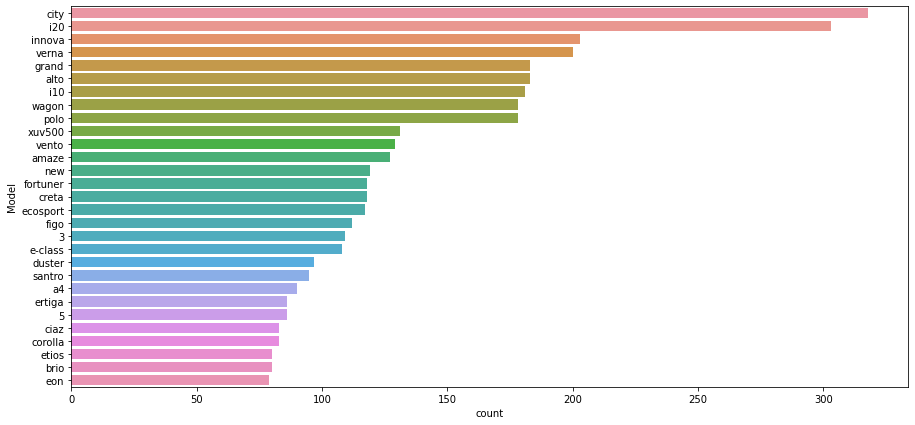

In [47]:
plt.figure(figsize = (15, 7))
sns.countplot(y = "Model", data = data, order = data["Model"].value_counts().index[1:30]);

**Observations**
* It is clear from the above charts that our dataset contains used cars from luxury as well as budget-friendly brands.
* we have extracted brand name and model name, we get a better understanding of the cars we have in our data.

its also likely that the approach is flawed, as some models have weird names, e.g. "new".

In [48]:
data.groupby(["Brand"]).agg({'Name': "count", "Price":'mean'}).sort_values('Price', ascending = False)

,Name,Price
Brand,,
lamborghini,1,145327.200000
bentley,2,71452.540000
porsche,19,58552.732567
land,67,47545.610070
jaguar,48,45574.912685
mini,31,32573.787662
mercedes-benz,380,32468.366265
audi,285,30927.701331
bmw,311,30389.957200


**Observations**
* The output is very close to our expectation (domain knowledge), in terms of brand order. The mean price of a used Lamborghini is 145327.20 USD and that of cars from other luxury brands follow in descending order.

* Towards the bottom end, we have more budget friendly brands.

* We can see that there is some missingness in our data which we will treat further.

### **Missing value treatment**

> Not all methods require to drop missing values! e.g. random forest. So questionable to impute or drop at this point.

In [49]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

In [50]:
(data.isnull().sum()/data.shape[0]).sort_values()


Name                     0.000000
kilometers_driven_log    0.000000
Brand                    0.000000
Owner_Type               0.000000
Transmission             0.000000
Model                    0.000000
Kilometers_Driven        0.000000
Year                     0.000000
Location                 0.000000
Fuel_Type                0.000000
Mileage                  0.000276
Engine                   0.006343
Seats                    0.007308
Power                    0.024131
Price                    0.170160
price_log                0.170160
New_price                0.861280
dtype: float64

> Use percentages

**Observations**
* Engine displacement information of 46 observations is missing and a maximum power of 175 entries is missing.
* Information about the number of seats is not available for 53 entries.
* New Price as we saw earlier has a huge missing count. 86% could be worth to remove the column.
* Price is also missing for 1234 entries. Since price is the response variable that we want to predict, we will have to drop these rows when we build a model.

In [52]:
import missingno as msno

<AxesSubplot: >

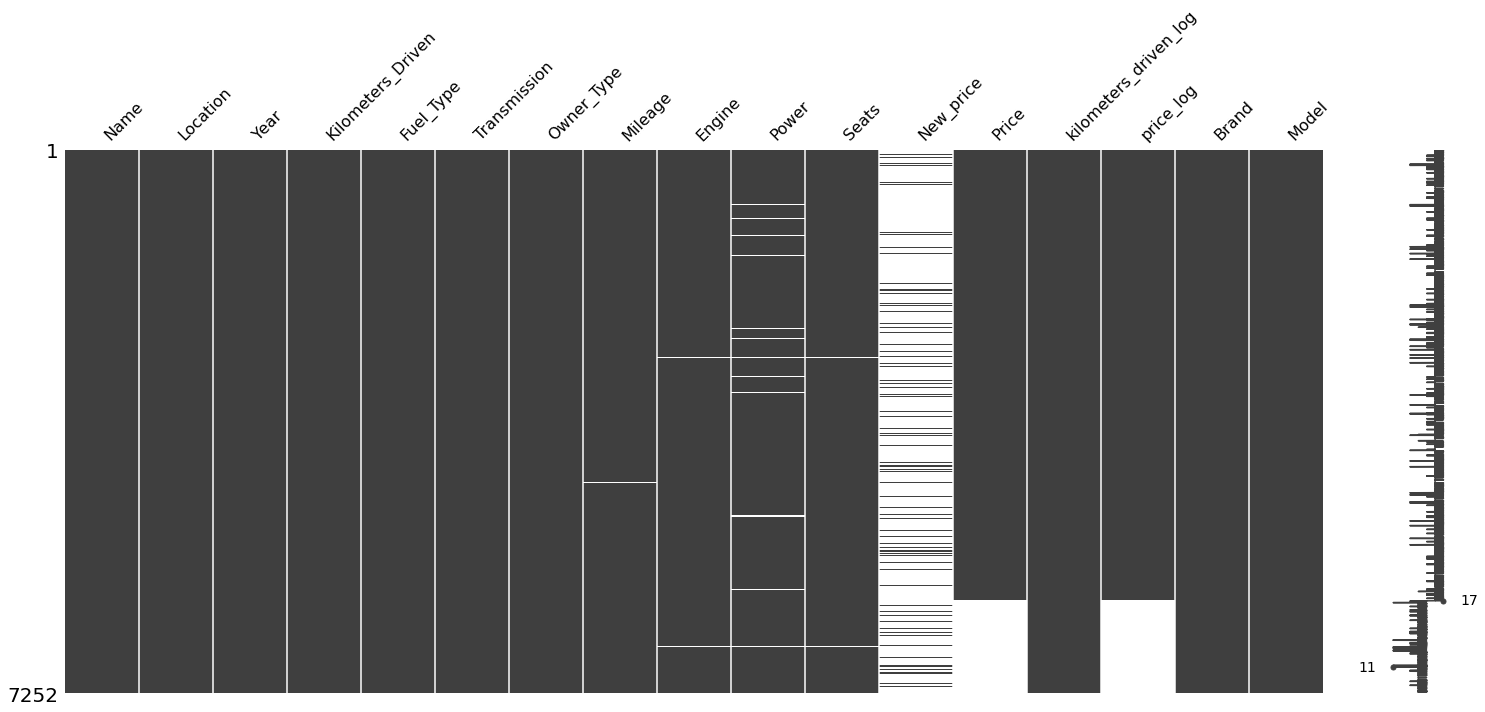

In [53]:
msno.matrix(data)

<AxesSubplot: >

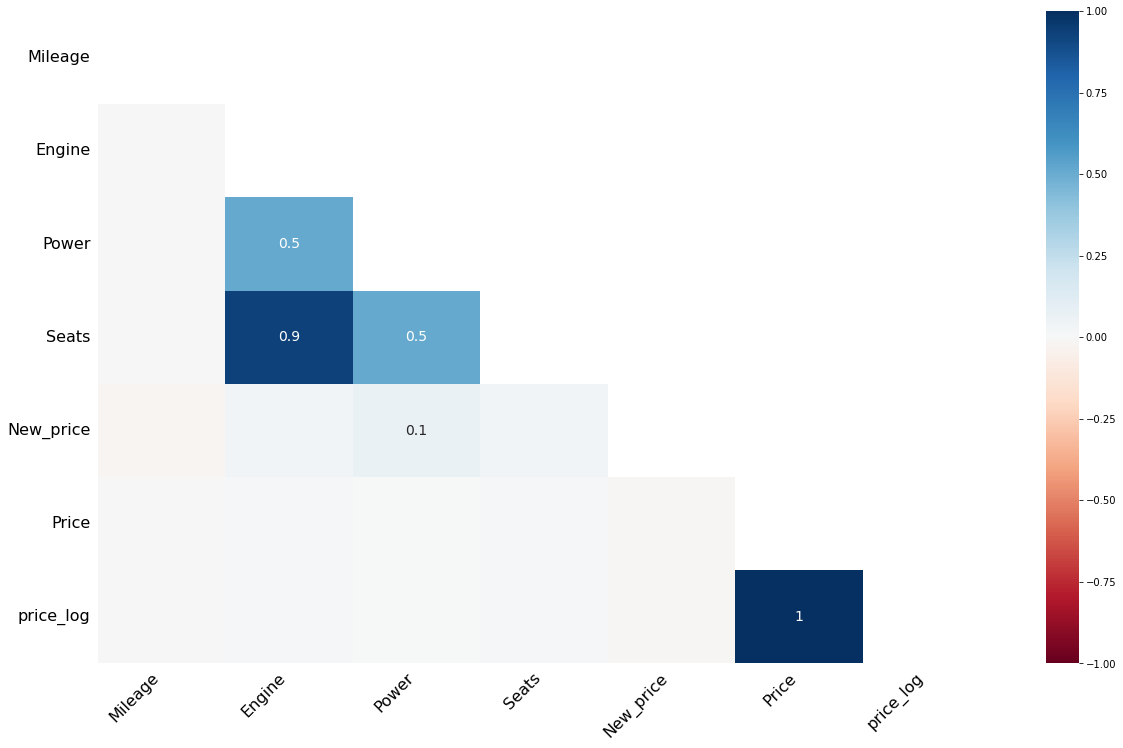

In [54]:
msno.heatmap(data)

* Medium to strong missingness correlation for Seats, Power, Engine, with Seats and Engine mostly together missing.
* Not MCAR as missingness is related.

**Missing values in Seats**

In [55]:
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,3572.6270,11.002200,8.181056,honda,city
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2555.3366,10.645449,7.845939,maruti,swift
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,NaN,4359.8160,11.162460,8.380185,ford,figo
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,2119.3550,11.490680,7.658867,maruti,swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,32093.0900,10.915107,10.376396,land,rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3875.3920,10.915179,8.262402,honda,city
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,7024.1480,10.825661,8.857109,maruti,swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1816.5900,11.652687,7.504716,honda,city
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,49508.1328,11.142992,10.809892,land,rover
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,NaN,2058.8020,11.385092,7.629880,honda,city


In [56]:
# We'll impute these missing values one by one, by taking median number of seats for the particular car,
# Using the Brand and Model name
data.groupby(["Brand", "Model"], as_index = False)["Seats"].median()

,Brand,Model,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
...,...,...,...
217,volvo,s60,5.0
218,volvo,s80,5.0
219,volvo,v40,5.0
220,volvo,xc60,5.0


In [57]:
data.groupby(["Brand", "Model"])["Seats"].transform(lambda x: x.fillna(x.median()))

0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
       ... 
7248    5.0
7249    5.0
7250    5.0
7251    5.0
7252    5.0
Name: Seats, Length: 7252, dtype: float64

In [58]:
data.shape

(7252, 17)

In [59]:
# Impute missing Seats
data["Seats_imp"] = data.groupby(["Brand", "Model"])["Seats"].transform(lambda x: x.fillna(x.median()))

<AxesSubplot: ylabel='Frequency'>

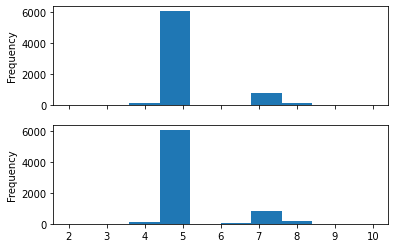

In [60]:
fig, axes = plt.subplots(nrows=2, sharex=True)
data["Seats"].plot(kind='hist', ax=axes[0])
data["Seats_imp"].plot(kind='hist', ax=axes[1])
#data["Seats_imp"].plot(kind='kde', ax=axes[1])

In [61]:
data["Seats"] = data.groupby(["Brand", "Model"])["Seats"].transform(lambda x: x.fillna(x.median()))

In [62]:
del data["Seats_imp"]

In [63]:
data['Seats'].isnull().sum()

3

In [64]:
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1816.590,10.933107,7.504716,maruti,estilo
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,3027.650,10.596635,8.015542,maruti,estilo
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,2119.355,10.839581,7.658867,maruti,estilo


In [65]:
# Maruti Estilo can accomodate 5
data["Seats"] = data["Seats"].fillna(5.0)

In [66]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

**Missing values for Mileage**

In [67]:
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,16446.1948,15743.780,10.819778,9.664201,mahindra,e
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,15441.015,10.691945,9.644783,toyota,prius


In [68]:
data[data['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,16446.1948,15743.780,10.819778,9.664201,mahindra,e
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,15441.015,10.691945,9.644783,toyota,prius


**Observation**
* 2 Electric car variants don't have entries for Mileage.

> Careful with the imputation! We have only these two cares from type electric in the whole sample. Imputation using other fuel-type cars could be misleading. The mileage km per galeon or other does not *APPLY*  to electric cars! **IMputation could be is wrong!**

In [69]:
# Impute missing Mileage
data["Mileage"].fillna(data['Mileage'].median(), inplace = True)

In [70]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

**Missing values for Engine**

In [71]:
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,5.0,NaN,3572.6270,11.002200,8.181056,honda,city
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,2555.3366,10.645449,7.845939,maruti,swift
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,5.0,NaN,2119.3550,11.490680,7.658867,maruti,swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,5.0,NaN,32093.0900,10.915107,10.376396,land,rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,5.0,NaN,3875.3920,10.915179,8.262402,honda,city
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,7024.1480,10.825661,8.857109,maruti,swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,5.0,NaN,1816.5900,11.652687,7.504716,honda,city
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,5.0,NaN,49508.1328,11.142992,10.809892,land,rover
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,3814.8390,10.096378,8.246654,maruti,swift
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,5.0,NaN,2337.3458,10.861803,7.756771,hyundai,santro


> Mostly cars with 5 seats

In [72]:

data['engine_null'] = data['Engine'].isnull()
data.groupby('engine_null')['Seats'].value_counts(normalize=True)

engine_null  Seats
False        5.0      0.839994
             7.0      0.110602
             8.0      0.023591
             4.0      0.016514
             6.0      0.005273
             2.0      0.002498
             10.0     0.001110
             9.0      0.000416
True         5.0      0.978261
             7.0      0.021739
Name: Seats, dtype: float64

In [73]:
data['Engine'].median(),

(1493.0,)

In [74]:
# Impute missing Engine
data["Engine"].fillna(data['Engine'].median(), inplace = True)

In [75]:
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model,engine_null


In [76]:
del data['engine_null']

**Missing values for Power**

In [77]:
# Impute missing Power
data["Power"].fillna(data['Power'].median(), inplace = True)

In [78]:
data["Power_imp"] = data["Power"].fillna(data['Power'].median())

<AxesSubplot: ylabel='Frequency'>

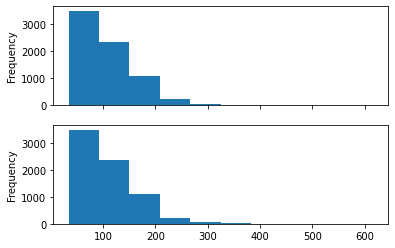

In [79]:
fig, axes = plt.subplots(nrows=2, sharex=True)
data["Power"].plot(kind='hist', ax=axes[0])
data["Power_imp"].plot(kind='hist', ax=axes[1])

In [80]:
data["Power"] = data["Power"].fillna(data['Power'].median())

In [81]:
del data["Power_imp"]

**Missing values for New_price**

Most prices are missing.

Do we have enough information in the available sub-sample to use it for imputation? Questionable. Especially as we don't have data for whole brands, incl. the expensive brands

In [82]:
data.groupby('Brand')['New_price'].mean().sort_values()

Brand
datsun             5871.439073
renault            9296.169958
maruti             9501.864341
tata              10627.983085
fiat              10902.567650
mahindra          13358.328206
nissan            14063.593600
honda             14132.778378
hyundai           14334.292477
volkswagen        14423.724600
ford              17044.625483
jeep              27547.153200
toyota            28613.740387
skoda             31746.207814
mitsubishi        40345.998108
isuzu             40788.500800
mini              49525.342600
volvo             52172.464800
jaguar            70793.377343
bmw               75658.955067
audi              78890.536434
mercedes-benz     89185.424261
land             144506.101320
porsche          164704.160000
bentley          454147.500000
ambassador                 NaN
chevrolet                  NaN
force                      NaN
hindustan                  NaN
lamborghini                NaN
opelcorsa                  NaN
smart                      NaN
Na

In [83]:
data.groupby('Model')['New_price'].mean().sort_values()

Model
redi-go    5001.677800
alto       5289.408952
santro     5510.323000
kwid       5720.942130
eeco       5901.322371
              ...     
xenon              NaN
xj                 NaN
yeti               NaN
z4                 NaN
zen                NaN
Name: New_price, Length: 218, dtype: float64

In [84]:
# Impute missing New_price
data["New_price"].fillna(data['New_price'].median(), inplace = True)

In [85]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

### Drop Target

Before we drop missing prices, investigate missingness

In [86]:
data['Price_na'] = data["Price"].isna()

In [87]:
data.groupby('Price_na').agg(['mean', 'median'])

Year        Kilometers_Driven             Mileage         \
                 mean median              mean   median       mean median   
Price_na                                                                    
False     2013.357594   2014      57668.047690  53000.0  18.135329  18.16   
True      2013.400324   2014      58507.288493  54572.5  18.173857  18.25   

               Engine               Power            Seats         \
                 mean  median        mean median      mean median   
Price_na                                                            
False     1620.281157  1493.0  112.771505   94.0  5.277999    5.0   
True      1592.769854  1461.0  109.955644   94.0  5.283630    5.0   

             New_price                    Price             \
                  mean      median         mean     median   
Price_na                                                     
False     15919.848564  14011.9642  11469.03201  6830.3784   
True      15774.861256  14011.9642          NaN        NaN   

         kilometers_driven_log            price_log            
                          mean     median      mean    median  
Price_na                                                       
False                10.757961  10.878047  8.923956  8.829135  
True                 10.771700  10.907284       NaN       NaN

There is indicating missing car sub-group is only slighly different, e.g. engine displayment lower, driven longer.

In [88]:
del data['Price_na']

In [89]:
# Drop the rows where 'Price' == NaN
cars_data = data[data["Price"].notna()]

In [90]:
cars_data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
price_log                0
Brand                    0
Model                    0
dtype: int64

**Observation**
* All missing values have been treated.

## **Proposed approach**


**Potential techniques** :

 Since it is a regression problem we will first start with the parametric model - linear regression,Ridge Regression followed by the non-parametric models - Decision Tree and Random Forest.


> Simple interpretable models first. Check if there exists already a simple heuristic we can use as baseline


**Overall solution design** : 

The following would be the proposed solution design:

* examining the data description to gain an understanding of the fundamental statistics or data summary
* Univariate analysis to examine the distribution of the data and learn more about the outliers.
* Bivariate analysis to determine how various characteristics relate to the dependent variable
* In this example, there is no requirement for outlier treatment because the fancy cars that serve as outliers are those that would typically present in data and for which we would like our predictive model to account for the underlying pattern.
treatment of missing value using relevant methods.
* Feature engineering involves changing existing features and, if possible, adding new features.
* Choosing the model evaluation method from 1) R Squared 2) RMSE or any other regression analysis-related metrics.
* Splitting the data and proceeding with modeling.
* Model tuning to see if the performance of the model can be improved further.



**Measures of success** :

R-squared and RMSE can be used as a measure of success.

R-squared: This will tell us how much variation our predictive model can explain in data.

RMSE: This will give us a measure of how far off the model is predicting the original values on average.


We count errors above-the-real-price estimates and below equally as an error. But is this in agreement with KPIs and profit margin optimization?

### **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like - Name
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split Data**

In [91]:
cars_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price', 'kilometers_driven_log', 'price_log', 'Brand',
       'Model'],
      dtype='object')

In [92]:
X = cars_data.drop(['Name','Price','price_log','Kilometers_Driven'],axis = 1)
X = pd.get_dummies(X,drop_first = True)
y = cars_data[["price_log", "Price"]]

In [93]:
X

,Year,Mileage,Engine,Power,Seats,New_price,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,2010,26.60,998.0,58.16,5.0,14011.9642,11.184421,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,19.67,1582.0,126.20,5.0,14011.9642,10.621327,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Splitting along time axis?

In [94]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape)

(4212, 264) (1806, 264)


### Random split might not be in agreement with our solution setup, production application

In [95]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.
# The categorical column as the input and returns the boxplots and histograms for the variable.

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    #Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

### **Fitting a linear model**

In [96]:
lr = LinearRegression()

In [97]:
lr.fit(X_train,y_train['price_log'])

LinearRegression()

In [98]:
LR_score = get_model_score(lr)

R-sqaure on training set :  0.9399395114406706
R-square on test set :  0.8687919879687209
RMSE on training set :  3315.975847313033
RMSE on test set :  4889.058964271926


**Observation**
* Linear regression has performed well on training and test set.

> bayes error, bias error, variance error

In [99]:
import statsmodels.api as sm

**Important variables of Linear Regression**

In [100]:
# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(X_train)
# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     406.7
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        06:45:06   Log-Likelihood:                 1322.4
No. Observations:                4212   AIC:                            -2187.
Df Residuals:                    3983   BIC:                            -733.7
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [101]:
# Calculate Odds Ratio, probability
# Create a data frame to collate Odds ratio, probability and p-value of the coef
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])
olsmod['pval'] = olsmodel1.pvalues

In [102]:
# Filter by significant p-value (pval <0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by = "pval", ascending = False)
pval_filter = olsmod['pval']<= 0.05
olsmod[pval_filter]

,coef,pval
Model_getz,-2.752724e-01,0.043615
Model_verna,2.580357e-01,0.038206
Model_accent,-2.802639e-01,0.037363
Model_mustang,3.840415e-01,0.030159
New_price,-6.886687e-07,0.024525
...,...,...
Brand_mahindra,-8.224693e+00,0.000000
Brand_maruti,-8.334268e+00,0.000000
Brand_mercedes-benz,-7.100557e+00,0.000000
Brand_mini,-5.713249e+00,0.000000


In [103]:
# We are looking are overall significant varaible
pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print(start+'Most overall significant categorical varaibles of LINEAR REGRESSION  are '+end,':\n',sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Model', 'New_price', 'Fuel_Type', 'Location', 'Engine', 'Owner_Type', 'Power', 'Transmission', 'kilometers_driven_log', 'Brand', 'Year']


### **Ridge Regression**

In [104]:
rdg = Ridge()

In [105]:
rdg.fit(X_train,y_train['price_log'])

Ridge()

In [106]:
Ridge_score = get_model_score(rdg)

R-sqaure on training set :  0.9305807350677577
R-square on test set :  0.8942380773756256
RMSE on training set :  3564.9786528967416
RMSE on test set :  4389.446559448696


Ridge()

**Observation**
* Ridge regression is able to generalize well compared to Linear Regression.

### **Decision Tree**

In [107]:
dtree = DecisionTreeRegressor(random_state = 1)

In [108]:
dtree.fit(X_train,y_train['price_log'])

DecisionTreeRegressor(random_state=1)

In [109]:
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.9999965696959587
R-square on test set :  0.8271810954694373
RMSE on training set :  25.060125164419336
RMSE on test set :  5611.005847666234


**Observation**
* Decision Tree is overfitting on the training set and hence not able to generalize well on the test set.

In [110]:
# Importance of features in the tree building ( The importance of a feature is computed as the 
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.605629
Year                   0.231424
Engine                 0.044316
Mileage                0.016410
kilometers_driven_log  0.015047
...                         ...
Model_logan            0.000000
Model_lodgy            0.000000
Model_lancer           0.000000
Model_koleos           0.000000
Model_zest             0.000000

[264 rows x 1 columns]


**Observation**
* Power, Year and Engine are the top 3 important features of decision tree model.

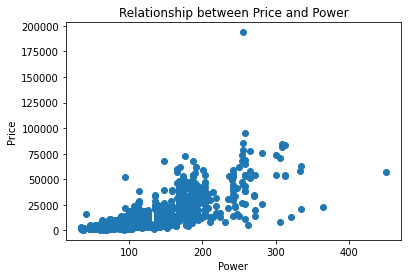

In [154]:
plt.scatter(x_test['Power'], y_test['Price'])
plt.xlabel('Power')
plt.ylabel('Price')
plt.title('Relationship between Price and Power')
plt.show()

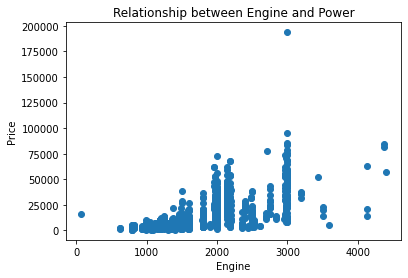

In [155]:
plt.scatter(x_test['Engine'], y_test['Price'])
plt.xlabel('Engine')
plt.ylabel('Price')
plt.title('Relationship between Engine and Power')
plt.show()

### **Random Forest**

In [111]:
rf = RandomForestRegressor(random_state = 1,oob_score = True)

In [112]:
rf.fit(X_train,y_train['price_log'])

RandomForestRegressor(oob_score=True, random_state=1)

In [113]:
RandomForest_model = get_model_score(rf)

R-sqaure on training set :  0.9769954517943732
R-square on test set :  0.8509759976274887
RMSE on training set :  2052.2193704438496
RMSE on test set :  5210.425719926821


**Observation**
* Random Forest model has performed well on training and test set.

**Feature Importance**

In [114]:
# Importance of features in the tree building ( The importance of a feature is computed as the 
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.610115
Year                   0.231685
Engine                 0.037361
kilometers_driven_log  0.017384
Mileage                0.013777
...                         ...
Model_cedia            0.000000
Model_e                0.000000
Model_wr-v             0.000000
Model_boxster          0.000000
Model_1000             0.000000

[264 rows x 1 columns]


**Observation**
* Power, Year and Engine are the top 3 important features of decision tree model.

### **Hyperparameter Tuning - Decision Tree**

Why would you tune decision trees?

Overall, tuning decision trees can help to improve the performance and generalizability of the model, making it better suited for real-world applications.

In [115]:
# Choose the type of regressor. 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': [None], 
              'min_samples_leaf': [1, 3, 5, 7],
              'max_leaf_nodes' : [2, 5, 7] + [None],
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer,cv = 5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(min_samples_leaf=7, random_state=1)

Do not use R^2 for tuning.

In [116]:
dtree_tuned_score = get_model_score(dtree_tuned)

R-sqaure on training set :  0.9058842277225594
R-square on test set :  0.8053873428465277
RMSE on training set :  4150.9560336020795
RMSE on test set :  5954.298989516637


**Observation**
* Overfitting in decision tree is still there.

**Feature Importance**

In [117]:
# Importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.640341
Year                   0.242258
Engine                 0.046792
Mileage                0.018631
kilometers_driven_log  0.008941
...                         ...
Model_ecosport         0.000000
Model_eeco             0.000000
Model_elantra          0.000000
Model_elite            0.000000
Model_zest             0.000000

[264 rows x 1 columns]


**Observation**
* Power, Year and Engine are the top 3 important features of decision tree model.

### **Hyperparameter Tuning - Random Forest**

In [118]:
# Choose the type of regressor

rf_tuned = RandomForestRegressor(random_state = 1,oob_score = True)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[5,7,None],
                'max_features': ['sqrt','log2'],
                'n_estimators': [250,500,800,900]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5, verbose=10)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train['price_log'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START max_depth=5, max_features=sqrt, n_estimators=250...........
[CV 1/5; 1/24] END max_depth=5, max_features=sqrt, n_estimators=250;, score=0.649 total time=   1.6s
[CV 2/5; 1/24] START max_depth=5, max_features=sqrt, n_estimators=250...........
[CV 2/5; 1/24] END max_depth=5, max_features=sqrt, n_estimators=250;, score=0.668 total time=   1.5s
[CV 3/5; 1/24] START max_depth=5, max_features=sqrt, n_estimators=250...........
[CV 3/5; 1/24] END max_depth=5, max_features=sqrt, n_estimators=250;, score=0.688 total time=   1.6s
[CV 4/5; 1/24] START max_depth=5, max_features=sqrt, n_estimators=250...........
[CV 4/5; 1/24] END max_depth=5, max_features=sqrt, n_estimators=250;, score=0.651 total time=   1.5s
[CV 5/5; 1/24] START max_depth=5, max_features=sqrt, n_estimators=250...........
[CV 5/5; 1/24] END max_depth=5, max_features=sqrt, n_estimators=250;, score=0.672 total time=   1.4s
[CV 1/5; 2/24] START max_dep

[CV 1/5; 10/24] END max_depth=7, max_features=sqrt, n_estimators=500;, score=0.730 total time=   3.5s
[CV 2/5; 10/24] START max_depth=7, max_features=sqrt, n_estimators=500..........
[CV 2/5; 10/24] END max_depth=7, max_features=sqrt, n_estimators=500;, score=0.754 total time=   3.7s
[CV 3/5; 10/24] START max_depth=7, max_features=sqrt, n_estimators=500..........
[CV 3/5; 10/24] END max_depth=7, max_features=sqrt, n_estimators=500;, score=0.768 total time=   3.6s
[CV 4/5; 10/24] START max_depth=7, max_features=sqrt, n_estimators=500..........
[CV 4/5; 10/24] END max_depth=7, max_features=sqrt, n_estimators=500;, score=0.742 total time=   3.5s
[CV 5/5; 10/24] START max_depth=7, max_features=sqrt, n_estimators=500..........
[CV 5/5; 10/24] END max_depth=7, max_features=sqrt, n_estimators=500;, score=0.756 total time=   3.4s
[CV 1/5; 11/24] START max_depth=7, max_features=sqrt, n_estimators=800..........
[CV 1/5; 11/24] END max_depth=7, max_features=sqrt, n_estimators=800;, score=0.730 to

[CV 1/5; 19/24] END max_depth=None, max_features=sqrt, n_estimators=800;, score=0.925 total time=  18.3s
[CV 2/5; 19/24] START max_depth=None, max_features=sqrt, n_estimators=800.......
[CV 2/5; 19/24] END max_depth=None, max_features=sqrt, n_estimators=800;, score=0.936 total time=  18.1s
[CV 3/5; 19/24] START max_depth=None, max_features=sqrt, n_estimators=800.......
[CV 3/5; 19/24] END max_depth=None, max_features=sqrt, n_estimators=800;, score=0.942 total time=  17.9s
[CV 4/5; 19/24] START max_depth=None, max_features=sqrt, n_estimators=800.......
[CV 4/5; 19/24] END max_depth=None, max_features=sqrt, n_estimators=800;, score=0.912 total time=  17.6s
[CV 5/5; 19/24] START max_depth=None, max_features=sqrt, n_estimators=800.......
[CV 5/5; 19/24] END max_depth=None, max_features=sqrt, n_estimators=800;, score=0.940 total time=  17.8s
[CV 1/5; 20/24] START max_depth=None, max_features=sqrt, n_estimators=900.......
[CV 1/5; 20/24] END max_depth=None, max_features=sqrt, n_estimators=90

RandomForestRegressor(max_features='sqrt', n_estimators=900, oob_score=True,
                      random_state=1)

In [119]:
rf_tuned_score = get_model_score(rf_tuned)

R-sqaure on training set :  0.9695575689453665
R-square on test set :  0.8627639189129721
RMSE on training set :  2360.785852260588
RMSE on test set :  5000.1064606927785


**Observation**
* There's a slight improvement in the Random Forest model after tuning.

**Feature Importance**

In [120]:
# Importance of features in the tree building ( The importance of a feature is computed as the 
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                          Imp
Power                0.177390
Engine               0.134539
Year                 0.107423
Transmission_Manual  0.091005
Mileage              0.047074
...                       ...
Model_a7             0.000000
Model_e              0.000000
Model_cedia          0.000000
Model_boxster        0.000000
Model_beetle         0.000000

[264 rows x 1 columns]


**Observation**
* Power, Year and Engine are the top 3 important variables in predicting car price according to Random Forest.

In [121]:
# Defining list of models
models = [lr,rdg,dtree, dtree_tuned, rf, rf_tuned]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# Looping through all the models to get the rmse and r2 scores
for model in models:
  
    # Accuracy score
    j = get_model_score(model, False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [122]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Tuned Decision Tree', 'Random Forest',
                                          'Tuned Random Forest'], 
                                          'Train_r2' : r2_train,'Test_r2' : r2_test,
                                          'Train_RMSE' : rmse_train,'Test_RMSE' : rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.939940,0.868792,3315.975847,4889.058964
1,Ridge Regression,0.930581,0.894238,3564.978653,4389.446559
2,Decision Tree,0.999997,0.827181,25.060125,5611.005848
3,Tuned Decision Tree,0.905884,0.805387,4150.956034,5954.298990
4,Random Forest,0.976995,0.850976,2052.219370,5210.425720
5,Tuned Random Forest,0.969558,0.862764,2360.785852,5000.106461


* Ridge Regression and Linear Regression have performed very well on data. However, Ridge Regression has given a more generalized model on training and test set.
* There's still scope for improvement with tuning the hyperparameters of the Random Forest.

> In most  cases RF is superior to highly-biased linear models

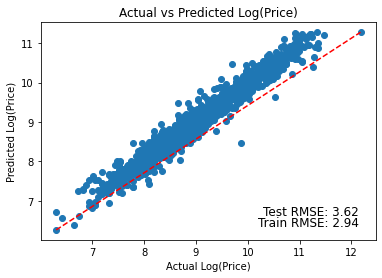

In [144]:
y_test_pred = rdg.predict(X_test)

# Plot the actual values against the predictions
plt.scatter(y_test['price_log'], y_test_pred)

# Add a line for perfect predictions
plt.plot([min(y_test['price_log']), max(y_test['price_log'])],
         [min(y_test_pred), max(y_test_pred)],
         linestyle='--', color='red')

# Add labels and title to the plot
plt.xlabel('Actual Log(Price)')
plt.ylabel('Predicted Log(Price)')
plt.title('Actual vs Predicted Log(Price)')


rmse_train = 2.94
rmse_test = 3.62

# Add the R-square and RMSE values as a annotate
plt.annotate("Train RMSE: {:.2f}".format(rmse_train),
             xy=(0.95, 0.05), xycoords='axes fraction',
             fontsize=12, color='black',
             horizontalalignment='right', verticalalignment='bottom')

plt.annotate("Test RMSE: {:.2f}".format(rmse_test),
             xy=(0.95, 0.10), xycoords='axes fraction',
             fontsize=12, color='black',
             horizontalalignment='right', verticalalignment='bottom')


# Show the plot
plt.show()
#This will produce a scatter plot showing the relationship between the actual log-transformed prices and the predicted log-transformed prices. The red line in the plot represents the line of perfect predictions, where the actual values are equal to the predictions.






In [146]:
df = pd.DataFrame({'Actual':y_test['price_log'], 'predicted':y_test_pred})
df

,Actual,predicted
3767,9.343147,9.191757
3626,8.369012,8.636032
1683,10.648294,10.609771
3284,7.322395,7.286844
79,7.361616,7.498967
...,...,...
1697,8.277906,8.240406
188,8.625308,8.642613
2499,9.449674,9.469705
3887,10.069666,9.872397


**Refined insights**:
**Name:**

- With 2041 distinct values, the Name column is not very useful for our investigation. However, the name of the car comprises both the brand name and the model name, and we may process this column to extract these names in order to cut down on the number of levels.

**Extracting the car brands:**

- Maruti and Hyundai are the most common brands in our data when we separate the automobile brands from the name column.

**Extracting car model name:**

- After extracting the car name, it becomes obvious that our dataset includes used cars from both upscale and mainstream manufacturers.
- The average price of a used Lamborghini is 145327.20 USD, and the prices of vehicles from other luxury brands are listed after it in decreasing order. This result is quite close to what we had anticipated (based on our domain knowledge).
We have more cost-effective brands at the lower end.

**Important variable with Linear Regression:**
* The most important variables that significantly predict the price of used cars, according to the Linear Regression model, are-
    - Year
    - Power
    - New_price
    - Location
    - Kilometers_Driven
    - Fuel_Type
    - Owner_Type
    - Transmission

**Important variable with Random Forest:**
* The most important determinants of the price of used cars, as determined by the Random Forest model, are - 
 -The year of manufacturing
 -Engine
 -Mileage


**Proposal for the final solution design**:


* Our final Ridge Regression model's R-squared on the test data is 0.89, meaning it can explain 89% of the variation in the data. Additionally, the RMSE on the test data is 3.62, indicating that we can forecast values that are very near to the original values. We may utilize this model in production because it is really good.

